<CENTER>
    <h1>LegalTech HackZurich 2020</h1>
    <br><hr></br>
    <a href="http://universidad.ch/hackzurich/suite/" class="icons"><img src="https://hackzurich.com/media/pages/workshops/15-legaltech/4173366116-1599065131/legaltech-600x-copy-600x.png" style="width:20%"></a>
</CENTER>

In [1]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [2]:
from IPython.display import IFrame
IFrame('./contract-page-example.png', width="100%", height=800)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract

In [4]:
import imutils
from imutils import contours
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local

In [5]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [6]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

In [7]:
## clean ol files
import os
os.system('rm -r boxes.png numbers.png')

256

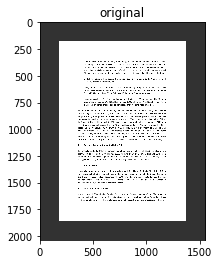

In [8]:
#orig = cv2.imread("receipt05.jpg")
#orig = cv2.imread("IMG_20200908_181359.jpg")
orig = cv2.imread("contract-page-example.png")

displayColorImage(orig, "original")

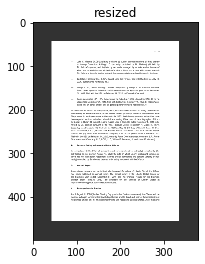

In [9]:
image = orig.copy()
ratio = image.shape[0]/500.0
image = imutils.resize(image, height=500)
displayColorImage(image,"resized")

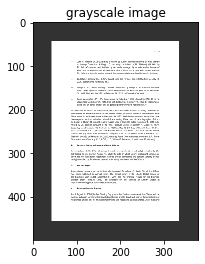

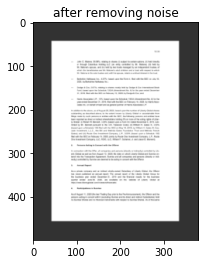

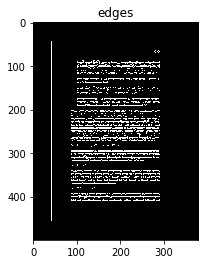

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray,"grayscale image")
gray = cv2.GaussianBlur(gray, (5,5),0)
displayGrayScaleImage(gray,"after removing noise")
edged = cv2.Canny(gray, 75, 200)
displayGrayScaleImage(edged,"edges")

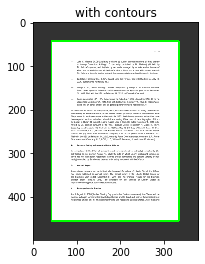

[[[ 42  43]]

 [[ 42 456]]

 [[334 456]]

 [[334  43]]]
[[ 42  43]
 [ 42 456]
 [334 456]
 [334  43]]


In [11]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:4]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
    if len(approx) == 4 :
        screenCnt = approx
        break

cv2.drawContours(image, [screenCnt], -1, (0,255,0),2)
displayColorImage(image, "with contours")
print(screenCnt)
print(screenCnt.reshape(4,2))

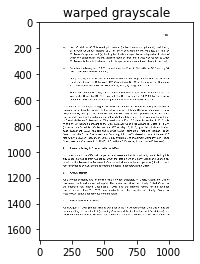

In [12]:
warped = four_point_transform(orig, screenCnt.reshape(4,2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(warped, "warped grayscale")

In [13]:
cv2.imwrite('DR.png', warped)
overlay = warped.copy()

In [14]:
#warped = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, 7)
#displayGrayScaleImage(warped, "warped post adpative threshold")

In [15]:
##img = cv2.cvtColor(warped,cv2.COLOR_BGR2RGB)

In [16]:
##cv2.imshow('Result',img)

In [17]:
print(pytesseract.image_to_string(warped))

 

 

12|35

— John C. Malone, 30.06%; relating to shares (i) subject to certain options, (ii) held directly
or through Columbus Holding LLC (an entity controlled by Mr. Malone), (iii) held by
Mr. Malone's spouse, and (iv) held by two trusts managed by an independent trustee, of
which the beneficiaries are Mr. Malone's adult children and a trust with respect to which
Mr. Malone is the sole trustee and, with his spouse, retains a unitrust interest in the trust;

— Berkshire Hathaway Inc., 6.27%; based upon the Form 4, filed with the SEC on July 10,
2020, by Berkshire Hathaway Inc.;

— Dodge & Cox, 5.67%; relating to shares mostly held by Dodge & Cox International Stock
Fund; based upon the Schedule 13G/A (Amendment No. 4) for the year ended December
31, 2019, filed with the SEC on February 13, 2020, by Dodge & Cox; and

— Harris Associates L.P., 12%; based upon the Schedule 13G/A (Amendment No. 4) for the
year ended December 31, 2019, filed with the SEC on February 14, 2020, by Harris A

In [18]:
rst = pytesseract.image_to_string(warped)
f = open("result.txt", "w")
f.write(rst)
f.close()

In [19]:
import time

In [20]:
img = warped
#############################################
#### Detecting Words  ######
#############################################
#[   0          1           2           3           4          5         6       7       8        9        10       11 ]
#['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
sortfile = 'names-sorted-uniq.txt' ## file coming from Notebook name-extract-00.ipynb 

boxes = pytesseract.image_to_data(img)
for a,b in enumerate(boxes.splitlines()):
        print(b)
        if a!=0:
            b = b.split()
            if len(b)==12:
                if b[11] in open(sortfile).read():
                    x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
                    #cv2.putText(img,b[11],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)
                    cv2.rectangle(img, (x,y), (x+w, y+h), (50, 50, 255), 18)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1189	1681	-1	
2	1	1	0	0	0	0	0	1189	1	-1	
3	1	1	1	0	0	0	0	1189	1	-1	
4	1	1	1	1	0	0	0	1189	1	-1	
5	1	1	1	1	1	0	0	1189	1	95	 
2	1	2	0	0	0	0	0	2	1681	-1	
3	1	2	1	0	0	0	0	2	1681	-1	
4	1	2	1	1	0	0	0	2	1681	-1	
5	1	2	1	1	1	0	0	2	1681	95	 
2	1	3	0	0	0	962	94	45	14	-1	
3	1	3	1	0	0	962	94	45	14	-1	
4	1	3	1	1	0	962	94	45	14	-1	
5	1	3	1	1	1	962	94	45	14	82	12|35
2	1	4	0	0	0	185	187	823	126	-1	
3	1	4	1	0	0	185	187	823	126	-1	
4	1	4	1	1	0	185	187	822	18	-1	
5	1	4	1	1	1	185	195	19	2	75	—
5	1	4	1	1	2	239	187	40	14	93	John
5	1	4	1	1	3	289	187	17	14	92	C.
5	1	4	1	1	4	315	187	66	16	96	Malone,
5	1	4	1	1	5	390	187	63	14	96	30.06%;
5	1	4	1	1	6	455	187	73	18	96	relating
5	1	4	1	1	7	536	188	15	13	96	to
5	1	4	1	1	8	559	187	46	14	96	shares
5	1	4	1	1	9	607	187	32	18	96	(i)
5	1	4	1	1	10	647	187	60	18	96	subject
5	1	4	1	1	11	715	188	14	13	96	to
5	1	4	1	1	12	737	187	57	14	96	certain
5	1	4	1	1	13	802	187	60	18	96	optio

In [21]:
#displayColorImage(img, "original")

In [22]:
cv2.imwrite('boxes.png', img)

True

In [23]:
##############################################
##### Detecting ONLY Digits  ######
##############################################
#hImg, wImg = overlay.shape
#conf = r'--oem 3 --psm 6 outputbase digits'
#boxes = pytesseract.image_to_boxes(overlay,config=conf)
#for b in boxes.splitlines():
#    print(b)
#    b = b.split(' ')
#    print(b)
#    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
#    #cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
#    cv2.putText(overlay,b[0],(x,hImg- y+20),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)

In [24]:
#cv2.imwrite('numbers.png', overlay)

## New picture

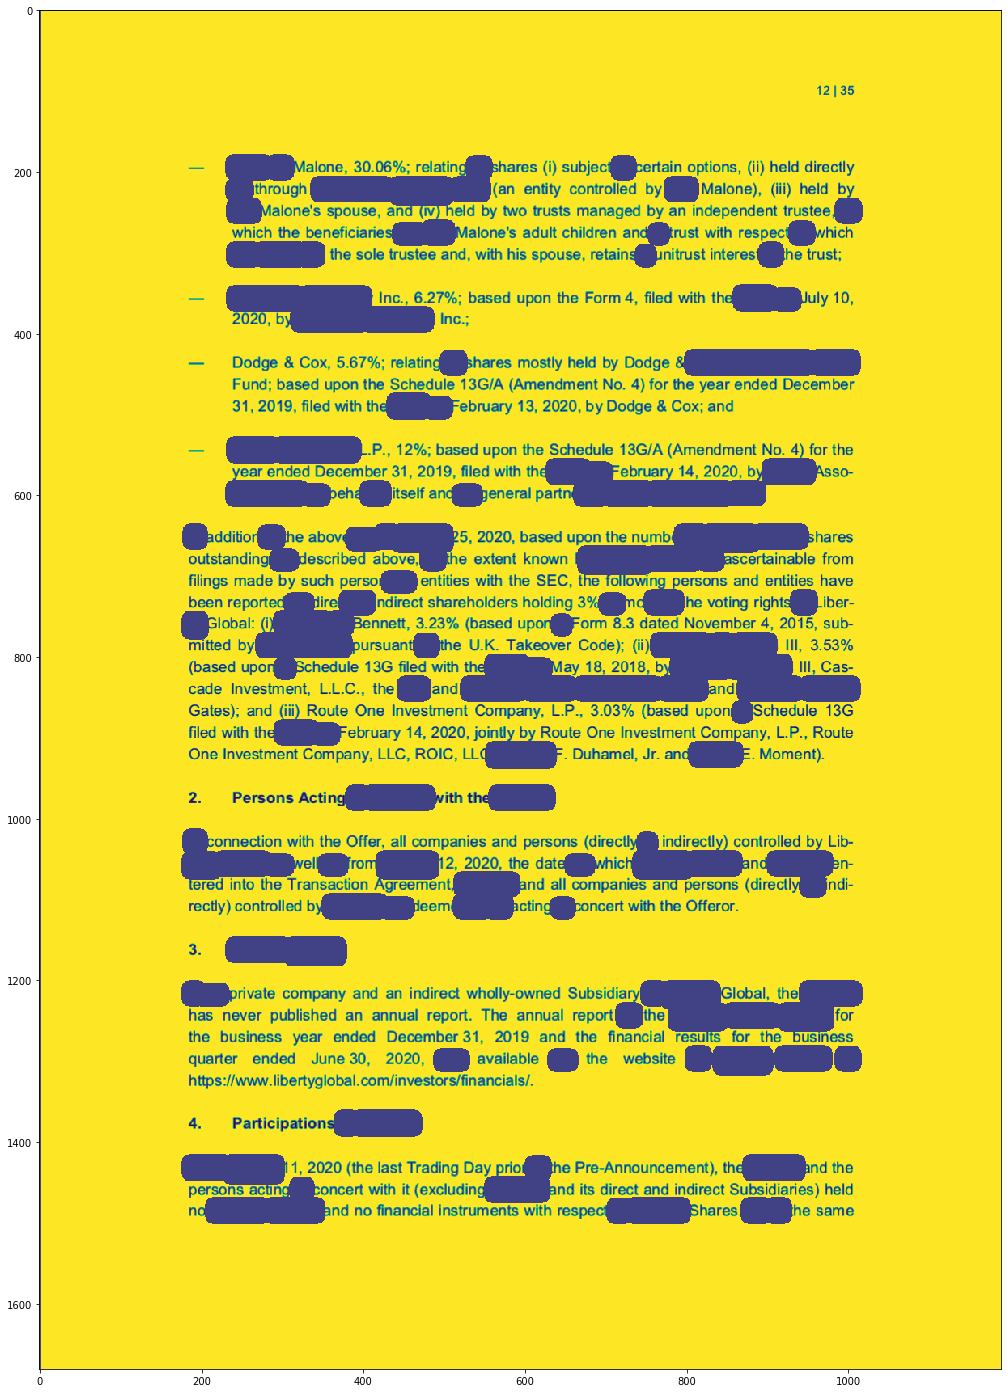

In [25]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
picBox = imageio.imread('boxes.png')
plt.figure(figsize = (25,25))
plt.imshow(picBox)

In [26]:
#picNum = imageio.imread('numbers.png')
#plt.figure(figsize = (25,25))
#plt.imshow(picNum)

In [27]:
from IPython.display import IFrame
IFrame('./boxes.png', width="100%", height=800)

<CENTER>
    <a href="http://universidad.ch/hackzurich/suite/" class="icons"><img src="http://universidad.ch/hackzurich/suite/logos/footer-hackathon.png" style="width:90%"></a>
</CENTER>